## Overview of Imbalanced Classification


## Prepare the Data for Modeling

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('../df_clean.csv')
df = df.dropna()
df = df.drop(['yod','yoa','b_wt'], axis=1)
X = df.drop(['los','los_binary'], axis=1)
X = pd.get_dummies(X)
y = df['los_binary']

D:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Model functions

In [ ]:
def log_model(x_train, y_train, x_test, y_test):
    model = LogisticRegression()
    model.fit(x_train, y_train)
    # Accuracry on training data
    print('Training Accuracy:', model.score(x_train, y_train))

    # Prediction and accuracy on testing data
    y_pred = model.predict(x_test)

    [tn, fp, fn, tp] = metrics.confusion_matrix(y_test, y_pred).ravel()
    
    d = pd.DataFrame({'Model':model,
                        'Sensitivity':[tp/(tp+fn)],
                         'Specificity':[tn/(tn+fp)],
                         'Balanced Accuracy':[.5*(tp/(tp+fn) + tn/(tn+fp))],
                          'Accuracy':[(tp+tn)/(tp+tn+fp+fn)]})  

    return d

## Split the data to train and test data



In [2]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.5)

## Imbalanced Dataset

We explore the target variable to see how unbalanced the data is.  It can be seen that the data is severely unbalanced. Thus, the data is imbalanced. 


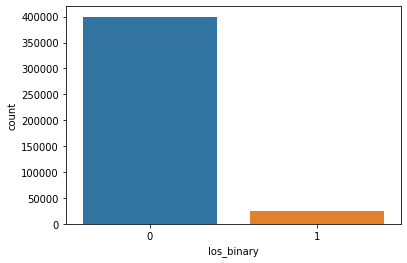

In [3]:
ax = sns.countplot(y_train)

## Model on Imbalanced Data

We investigate how well models perform on imbalanced data. 

In [4]:
# Create a decision tree and train
model = LogisticRegression()
model.fit(x_train, y_train)
# Accuracry on training data
print('Training Accuracy:', model.score(x_train, y_train))

# Prediction and accuracy on testing data
y_pred = model.predict(x_test)

[tn, fp, fn, tp] = metrics.confusion_matrix(y_test, y_pred).ravel()
    
#     d = pd.DataFrame({'Model':['Decision Tree','Decision Tree','Decision Tree','Decision Tree'],
#                     'Metrics':['Sensitivity','Specificity','Balanced Accuracy','Accuracy'],
#                      'Values':[tp/(tp+fn), tn/(tn+fp), .5*(tp/(tp+fn) + tn/(tn+fp)), (tp+tn)/(tp+tn+fp+fn)]})
    
d = pd.DataFrame({'Model':model,
                    'Sensitivity':[tp/(tp+fn)],
                     'Specificity':[tn/(tn+fp)],
                     'Balanced Accuracy':[.5*(tp/(tp+fn) + tn/(tn+fp))],
                      'Accuracy':[(tp+tn)/(tp+tn+fp+fn)]})  

d

D:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Training Accuracy: 0.9405234463788645


,Model,Sensitivity,Specificity,Balanced Accuracy,Accuracy
0,"LogisticRegression(C=1.0, class_weight=None, d...",0.04878,0.997146,0.522963,0.940787


## Balance the data

Since models suffered greatly with imbalanced data.  We need to balance the data to improve model performances. An easy way to balance the data is Random Undersampling (RUS), which is randomly remove observations so that the two classes are balanced. 

### Random undersampling

In [19]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler()

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.5)
x_train, y_train = rus.fit_resample(x_train, y_train)

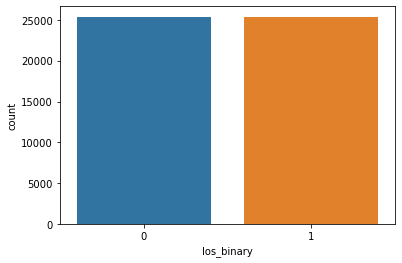

In [20]:
ax = sns.countplot(y_train)

## Rerun models on balanced data

In [12]:
model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
[tn, fp, fn, tp] = metrics.confusion_matrix(y_test, y_pred).ravel()
    
#     d = pd.DataFrame({'Model':['Decision Tree','Decision Tree','Decision Tree','Decision Tree'],
#                     'Metrics':['Sensitivity','Specificity','Balanced Accuracy','Accuracy'],
#                      'Values':[tp/(tp+fn), tn/(tn+fp), .5*(tp/(tp+fn) + tn/(tn+fp)), (tp+tn)/(tp+tn+fp+fn)]})
    
d = pd.DataFrame({'Model':model,
                    'Sensitivity':[tp/(tp+fn)],
                     'Specificity':[tn/(tn+fp)],
                     'Balanced Accuracy':[.5*(tp/(tp+fn) + tn/(tn+fp))],
                      'Accuracy':[(tp+tn)/(tp+tn+fp+fn)]})  

d

D:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


,Model,Sensitivity,Specificity,Balanced Accuracy,Accuracy
0,LogisticRegression(),0.723468,0.761262,0.742365,0.759014


### Oversampling

In [7]:
from imblearn.over_sampling import SMOTE
over_sampler = SMOTE()

In [6]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.5)

In [8]:
x_train, y_train = over_sampler.fit_resample(x_train, y_train)

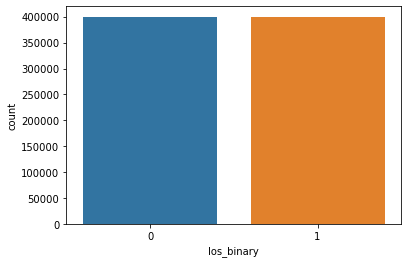

In [9]:
ax = sns.countplot(y_train)

In [10]:
model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
[tn, fp, fn, tp] = metrics.confusion_matrix(y_test, y_pred).ravel()

d = pd.DataFrame({'Model':model,
                    'Sensitivity':[tp/(tp+fn)],
                     'Specificity':[tn/(tn+fp)],
                     'Balanced Accuracy':[.5*(tp/(tp+fn) + tn/(tn+fp))],
                      'Accuracy':[(tp+tn)/(tp+tn+fp+fn)]})  

d

D:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


,Model,Sensitivity,Specificity,Balanced Accuracy,Accuracy
0,LogisticRegression(),0.313543,0.939936,0.62674,0.902574


So also not great

## Other undersampling
Neither actually finished...

In [19]:
from imblearn.under_sampling import ClusterCentroids
cc = ClusterCentroids()

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.5)

cc_x_train, cc_y_train = cc.fit_resample(x_train, y_train)

KeyboardInterrupt: 

In [ ]:
from imblearn.under_sampling import EditedNearestNeighbours
ENN = EditedNearestNeighbours()

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.5)

ENN_x_train, ENN_y_train = ENN.fit_resample(x_train, y_train)

## Other Models

In [3]:
from sklearn.metrics import r2_score
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler()

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.5)
x_train, y_train = rus.fit_resample(x_train, y_train)

The confusion matrix didn't work for any of these. How do we fix this?

### Decision Tree

In [15]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(x_train, y_train)

# y_pred = model.predict(x_test)
# [tn, fp, fn, tp] = metrics.confusion_matrix(y_test, y_pred).ravel()
 
# d = pd.DataFrame({'Model':model,
#                     'Sensitivity':[tp/(tp+fn)],
#                      'Specificity':[tn/(tn+fp)],
#                      'Balanced Accuracy':[.5*(tp/(tp+fn) + tn/(tn+fp))],
#                       'Accuracy':[(tp+tn)/(tp+tn+fp+fn)]})  

# d
print('Rsquared on Training', r2_score(y_train, model.predict(x_train)))
print('Rsquared on Testing', r2_score(y_test, model.predict(x_test)))

Rsquared on Training 0.9786163101562319
Rsquared on Testing -4.711924281709377


In [17]:
from sklearn.ensemble import AdaBoostRegressor

# Create a decision tree and train
model = AdaBoostRegressor()
model.fit(x_train, y_train)

# y_pred = model.predict(x_test)
# [tn, fp, fn, tp] = metrics.confusion_matrix(y_test, y_pred).ravel()
 
# d = pd.DataFrame({'Model':model,
#                     'Sensitivity':[tp/(tp+fn)],
#                      'Specificity':[tn/(tn+fp)],
#                      'Balanced Accuracy':[.5*(tp/(tp+fn) + tn/(tn+fp))],
#                       'Accuracy':[(tp+tn)/(tp+tn+fp+fn)]})  

# d
print('Rsquared on Training', r2_score(y_train, model.predict(x_train)))
print('Rsquared on Testing', r2_score(y_test, model.predict(x_test)))

Rsquared on Training 0.20753113811427282
Rsquared on Testing -2.446284271066722


In [18]:
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor()
model.fit(x_train, y_train)

# y_pred = model.predict(x_test)
# [tn, fp, fn, tp] = metrics.confusion_matrix(y_test, y_pred).ravel()
 
# d = pd.DataFrame({'Model':model,
#                     'Sensitivity':[tp/(tp+fn)],
#                      'Specificity':[tn/(tn+fp)],
#                      'Balanced Accuracy':[.5*(tp/(tp+fn) + tn/(tn+fp))],
#                       'Accuracy':[(tp+tn)/(tp+tn+fp+fn)]})  

# d
print('Rsquared on Training', r2_score(y_train, model.predict(x_train)))
print('Rsquared on Testing', r2_score(y_test, model.predict(x_test)))

Rsquared on Training 0.43662118875311406
Rsquared on Testing -2.2697172013814835
